# My Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

# Data Wrangling

In [2]:
df=pd.read_excel('D:/sql/Data set/Retail/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Preparing

## changing all 0 unit price to the mode price 

In [3]:
zero_G=df.loc[(df['UnitPrice']==0)&(df['CustomerID'].notnull()==True),['Description']]

In [4]:
a=list(zero_G['Description'])

In [5]:
for i in a:
    
    description_match = df['Description'] == i
    mode_price = df[description_match]['UnitPrice'].mode().iloc[0]
    df.loc[description_match & (df['UnitPrice'] == 0), 'UnitPrice'] = mode_price

## adding total price column

In [6]:
df['TotalPrice']=df['UnitPrice']*df['Quantity']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


# Data Cleaning

## Removing non customer & cancelled transactions

In [8]:
df2=df.loc[(df['Quantity']>0)&(df['CustomerID'].notnull()==True)]

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [10]:
pd.DataFrame(df2.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
InvoiceNo,18536
StockCode,3665
Description,3877
Quantity,302
InvoiceDate,17286
UnitPrice,440
CustomerID,4339
Country,37
TotalPrice,2940


## droping unimportant feature

In [11]:
df2.drop(['InvoiceNo','Description'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11616\708250059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['InvoiceNo','Description'],axis=1,inplace=True)


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StockCode    397924 non-null  object        
 1   Quantity     397924 non-null  int64         
 2   InvoiceDate  397924 non-null  datetime64[ns]
 3   UnitPrice    397924 non-null  float64       
 4   CustomerID   397924 non-null  float64       
 5   Country      397924 non-null  object        
 6   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 24.3+ MB


In [13]:
df2['shortened_date'] = df2['InvoiceDate'].dt.to_period('d')
df2['shortened_date']=df2['shortened_date'].dt.to_timestamp()


C:\Users\HP\AppData\Local\Temp\ipykernel_11616\2374054429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['shortened_date'] = df2['InvoiceDate'].dt.to_period('d')
C:\Users\HP\AppData\Local\Temp\ipykernel_11616\2374054429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['shortened_date']=df2['shortened_date'].dt.to_timestamp()


0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-09
541905   2011-12-09
541906   2011-12-09
541907   2011-12-09
541908   2011-12-09
Name: shortened_date, Length: 397924, dtype: datetime64[ns]

In [14]:
today_date = dt.datetime(2011, 12, 9)
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [15]:
pd.DataFrame(df2.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
StockCode,3665
Quantity,302
InvoiceDate,17286
UnitPrice,440
CustomerID,4339
Country,37
TotalPrice,2940
shortened_date,305


## grouping customer data

In [16]:
rfm = df2.groupby('CustomerID').agg({'shortened_date': lambda date: (today_date - date.max()).days,
                                    'Quantity': lambda num: num.sum(),
                                    'TotalPrice': lambda REVENUE: REVENUE.sum()
                                    })                                  
rfm

,shortened_date,Quantity,TotalPrice
CustomerID,,,
12346.0,325,74215,77183.60
12347.0,2,2458,4310.00
12348.0,75,2341,1797.24
12349.0,18,631,1757.55
12350.0,310,197,334.40
...,...,...,...
18280.0,277,45,180.60
18281.0,180,54,80.82
18282.0,7,103,178.05


In [17]:
rfm.rename(columns={'shortened_date': 'Recency'}, inplace=True)
rfm

,Recency,Quantity,TotalPrice
CustomerID,,,
12346.0,325,74215,77183.60
12347.0,2,2458,4310.00
12348.0,75,2341,1797.24
12349.0,18,631,1757.55
12350.0,310,197,334.40
...,...,...,...
18280.0,277,45,180.60
18281.0,180,54,80.82
18282.0,7,103,178.05


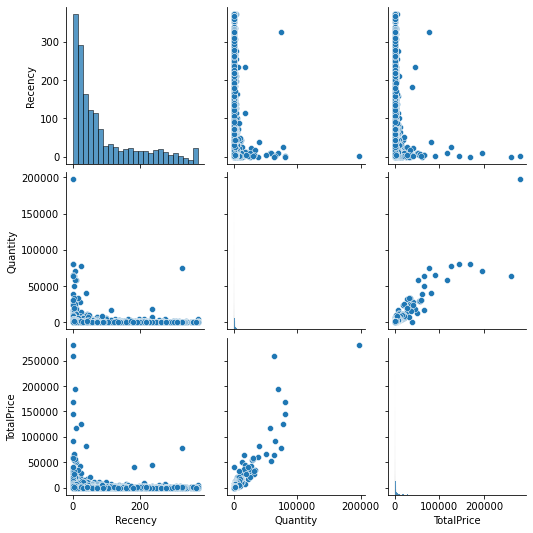

In [19]:
sns.pairplot(rfm)

## removing outliers

In [20]:
Q1 = rfm.quantile(0.25)
Q3 = rfm.quantile(0.75)
IQR = Q3 - Q1
outliers = ((rfm < (Q1 - 1.5 * IQR)) | (rfm > (Q3 + 1.5 * IQR))).any(axis=1)
cleaned_data = rfm[~outliers]

In [21]:
cleaned_data

,Recency,Quantity,TotalPrice
CustomerID,,,
12349.0,18,631,1757.55
12350.0,310,197,334.40
12352.0,36,536,2506.04
12353.0,204,20,89.00
12354.0,232,530,1079.40
...,...,...,...
18280.0,277,45,180.60
18281.0,180,54,80.82
18282.0,7,103,178.05


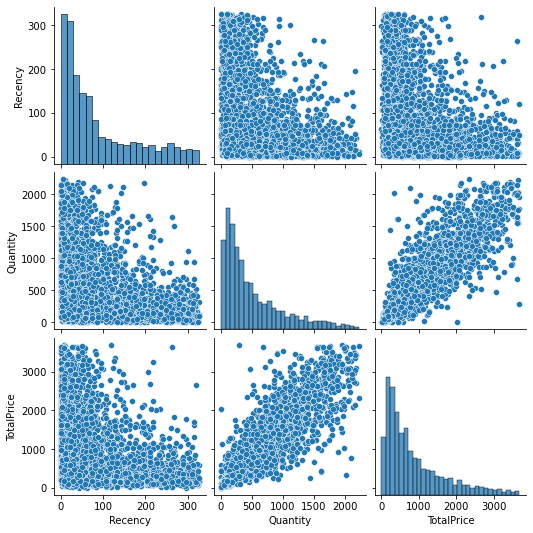

In [24]:
sns.pairplot(cleaned_data)

# Customer Segmentation by PCA & KMeans

In [25]:
from sklearn.cluster import KMeans

In [26]:
inertias=[]
for n in range(1,15):
    km=KMeans(n_clusters=n)
    km.fit(cleaned_data)
    inertias.append(km.inertia_)
    print(n,km.inertia_)

1 3277288549.4618907
2 1005431797.5025631
3 560559139.7425302
4 393586349.26976293
5 316721326.6913995
6 275771424.06714803
7 244564795.9601328
8 219184688.18239725
9 198799721.36637428
10 181217101.8285818
11 165341360.58313048
12 156216514.1568807
13 146432974.31990147
14 138838604.83805054


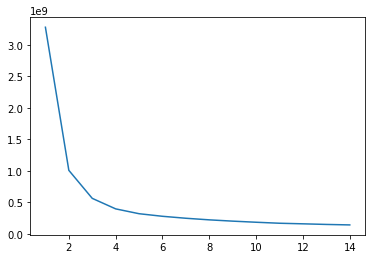

In [27]:
plt.plot(range(1,15),inertias)

In [28]:
km=KMeans(n_clusters=3)
predictions=km.fit_predict(cleaned_data)

In [29]:
predictions

array([0, 1, 2, ..., 1, 2, 2])

In [30]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial import ConvexHull

In [31]:
X_scl=StandardScaler().fit_transform(cleaned_data)

In [32]:
X_scl

array([[-0.80442919,  0.24400558,  1.0954819 ],
       [ 2.47453402, -0.64899869, -0.68020387],
       [-0.60230132,  0.0485323 ,  2.02938419],
       ...,
       [-0.92795178, -0.84241436, -0.87528413],
       [-0.97286908,  1.82013753,  1.51637364],
       [-0.53492537,  2.20902649,  1.19496223]])

In [33]:
dim_red=PCA()

In [34]:
Xpca=dim_red.fit_transform(X_scl)

In [35]:
dim_red.components_

array([[-0.40270144,  0.6477279 ,  0.64674579],
       [ 0.91532014,  0.28146231,  0.28804169],
       [-0.00453808, -0.70797425,  0.70622367]])

In [36]:
dim_red.explained_variance_ratio_

array([0.69675633, 0.26299562, 0.04024805])

In [37]:
for i in range(4):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(X_scl)
    print (i,"explained variance : ",sum(pca.explained_variance_.round(2)), "|","explained variance ratio : ",sum(pca.explained_variance_ratio_.round(2)))
    print ('')

0 explained variance :  0 | explained variance ratio :  0

1 explained variance :  2.09 | explained variance ratio :  0.7

2 explained variance :  2.88 | explained variance ratio :  0.96

3 explained variance :  3.0 | explained variance ratio :  1.0



In [38]:
pca = PCA(n_components = 3)
pca_result = pca.fit_transform(X_scl)

## evaluating models

In [39]:
distortions = []
labels_temp = [2,3,4,5]
for k in labels_temp:
    kmeanModel = KMeans(n_clusters=k,random_state=100)
    kmeanModel.fit(X_scl)
    cluster_labels = kmeanModel.fit_predict(X_scl)
    silhouette_avg = silhouette_score(pca_result, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    distortions.append(kmeanModel.inertia_)

For n_clusters = 2 The average silhouette_score is : 0.4829672692339475
For n_clusters = 3 The average silhouette_score is : 0.49354914061680283
For n_clusters = 4 The average silhouette_score is : 0.4505216745317121
For n_clusters = 5 The average silhouette_score is : 0.39402683548371287


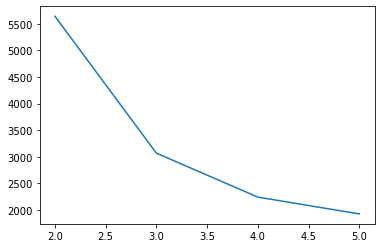

In [40]:
plt.plot(labels_temp, distortions)

In [41]:
kmeans = KMeans(n_clusters=3, random_state=100).fit(pca_result)
cluster_labels = list(kmeans.predict(X_scl))

In [42]:
projected = pd.concat([pd.DataFrame(pca_result),pd.DataFrame(cluster_labels).rename(columns ={0:'Labels'})],axis = 1)

In [43]:
projected

,0,1,2,Labels
0,1.190492,-0.352087,0.604556,2
1,-1.856792,1.886395,-0.032131,0
2,1.586479,0.046909,1.401573,1
3,-1.811381,0.606179,0.014875,1
4,-0.459076,1.545280,0.143219,0
...,...,...,...,...
3692,-2.034255,1.403903,0.055451,0
3693,-1.664138,0.376247,-0.040639,1
3694,-0.738054,-1.338599,-0.017528,1
3695,2.551438,0.058592,-0.213297,2


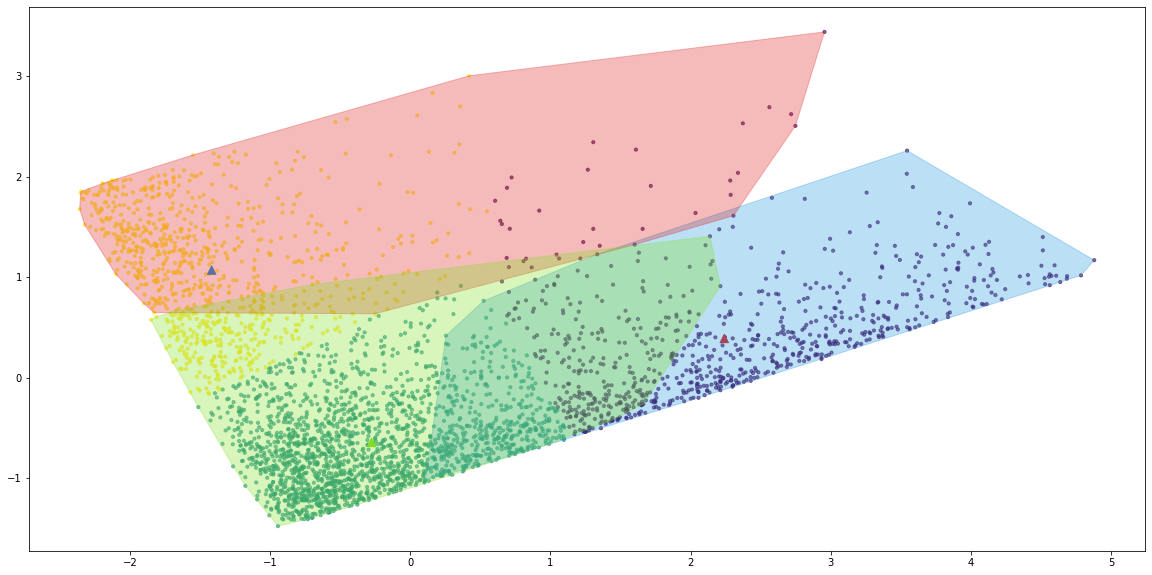

In [44]:
ig, ax = plt.subplots(1, figsize=(20,10))
colors = ['#DF2020', '#81DF20', '#2095DF']
# plot data
plt.scatter(projected[0].values, projected[1].values, c=list(kmeans.labels_), alpha = 0.6, s=10)
# plot centers
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in projected['Labels'].unique():
    points = projected[projected.Labels == i][[0,1]].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    

# EDA after Segmentation

In [45]:
cleaned_data['Segement'] = list(predictions)

C:\Users\HP\AppData\Local\Temp\ipykernel_11616\19297251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Segement'] = list(predictions)


In [46]:
cleaned_data

,Recency,Quantity,TotalPrice,Segement
CustomerID,,,,
12349.0,18,631,1757.55,0
12350.0,310,197,334.40,1
12352.0,36,536,2506.04,2
12353.0,204,20,89.00,1
12354.0,232,530,1079.40,0
...,...,...,...,...
18280.0,277,45,180.60,1
18281.0,180,54,80.82,1
18282.0,7,103,178.05,1


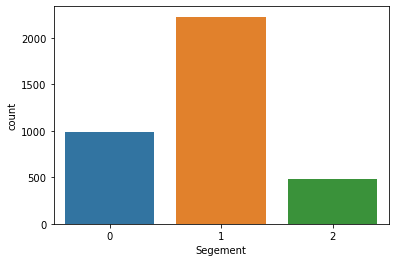

In [56]:
sns.countplot(x='Segement', data=cleaned_data)
plt.show()

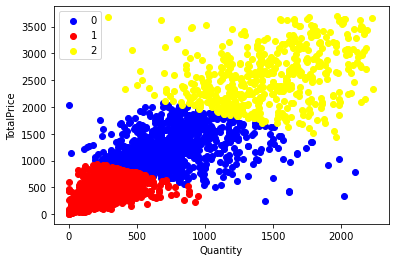

In [66]:
segment1 = cleaned_data[cleaned_data['Segement'] == 0]
segment2 = cleaned_data[cleaned_data['Segement'] == 1]
segment3 = cleaned_data[cleaned_data['Segement'] == 2]
plt.scatter(x=segment1['Quantity'], y=segment1['TotalPrice'], label=0, color='blue')
plt.scatter(x=segment2['Quantity'], y=segment2['TotalPrice'], label=1, color='red')
plt.scatter(x=segment3['Quantity'], y=segment3['TotalPrice'], label=2, color='yellow')
plt.xlabel('Quantity')
plt.ylabel('TotalPrice')
plt.legend()

plt.show()


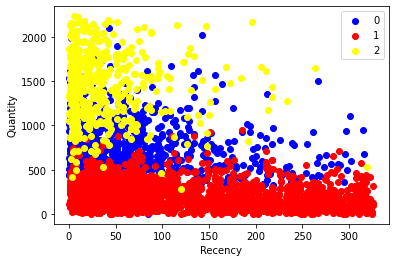

In [65]:
segment1 = cleaned_data[cleaned_data['Segement'] == 0]
segment2 = cleaned_data[cleaned_data['Segement'] == 1]
segment3 = cleaned_data[cleaned_data['Segement'] == 2]
plt.scatter(x=segment1['Recency'], y=segment1['Quantity'], label=0, color='blue')
plt.scatter(x=segment2['Recency'], y=segment2['Quantity'], label=1, color='red')
plt.scatter(x=segment3['Recency'], y=segment3['Quantity'], label=2, color='yellow')
plt.xlabel('Recency')
plt.ylabel('Quantity')
plt.legend()

plt.show()

In [47]:
customer_seg = cleaned_data[['Segement','Recency','Quantity','TotalPrice']].groupby('Segement').agg(['count','mean','max','sum'])
customer_seg

Recency                          Quantity                             \
           count        mean  max     sum    count         mean   max     sum   
Segement                                                                        
0            985   60.439594  316   59533      985   736.109645  2100  725068   
1           2227  113.848675  326  253541     2227   210.716659   950  469266   
2            485   37.756701  319   18312      485  1443.418557  2234  700058   

         TotalPrice                                     
              count         mean      max          sum  
Segement                                                
0               985  1220.063401  2073.43  1201762.450  
1              2227   366.801232   944.10   816866.343  
2               485  2542.480497  3692.28  1233103.041

In [70]:
cleaned_data['Quantity'].sum()

1894392

In [71]:
cleaned_data['TotalPrice'].sum()

3251731.834

In [69]:
print(f"{2227/3697*100}\n{985/3697*100}\n{485/3697*100}")

60.238030835812815
26.64322423586692
13.118744928320258


In [72]:
print(f"{469266/1894392*100}\n{725068/1894392*100}\n{700058/1894392*100}")

24.77132504782537
38.274443726536006
36.95423122563862


In [73]:
print(f"{816866.343/3251731.834*100}\n{1201762.450/3251731.834*100}\n{1233103.041/3251731.834*100}")

25.120962757717987
36.957612476970326
37.92142476531169


# Conclusions
## segment 1 are 60% of all customers & 24% of all quantity & 25% of all profits
## segment 0 are 27% of all customers & 38% of all quantity & 36% of all profits
## segment 2 are 13% of all customers & 36% of all quantity & 37% of all profits
